In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from utils.img_utils import *
from dataio.MimicCXRDataset import train_test_split_CXR
from hydra import initialize, initialize_config_module, initialize_config_dir, compose

with initialize(version_base=None, config_path="../configs"):
       cfg = compose(config_name="dataset_config")

print("running config:",cfg)

running config: {'root_dir': '/Users/ago/PycharmProjects/mml/data/mimic-cxr-preprocessed', 'class_names': ['Pneumonia'], 'trans_resize': 224, 'view_position': 'PA', 'splitting': {'method': 'random', 'train_val_split': 0.6, 'test_val_split': 0.5}, 'seed': 42}


## Verify the dataset

In [2]:
train_dict, test_dict, val_dict = train_test_split_CXR(cfg)

Root dir:  /Users/ago/PycharmProjects/mml/data/mimic-cxr-preprocessed
Image matrix shape:  (43082, 224, 224)
Number of metadata rows:  43082
Number of patients in the training set:  25849
Number of patients in the val set:  8617
Number of patients in the test set:  8616
Number of images in train set:  25849
Number of images in val set:  8617
Number of images in test set:  8616


In [3]:

# describe train, test, val datasets
print("train set description", train_dict['labels'].fillna(0).describe())
print("test set description", test_dict['labels'].fillna(0).describe())
print("val set description", val_dict['labels'].fillna(0).describe())

train set description           Pneumonia
count  25849.000000
mean       0.056134
std        0.230184
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
test set description          Pneumonia
count  8617.000000
mean      0.053847
std       0.225729
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
val set description          Pneumonia
count  8616.000000
mean      0.054318
std       0.226656
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


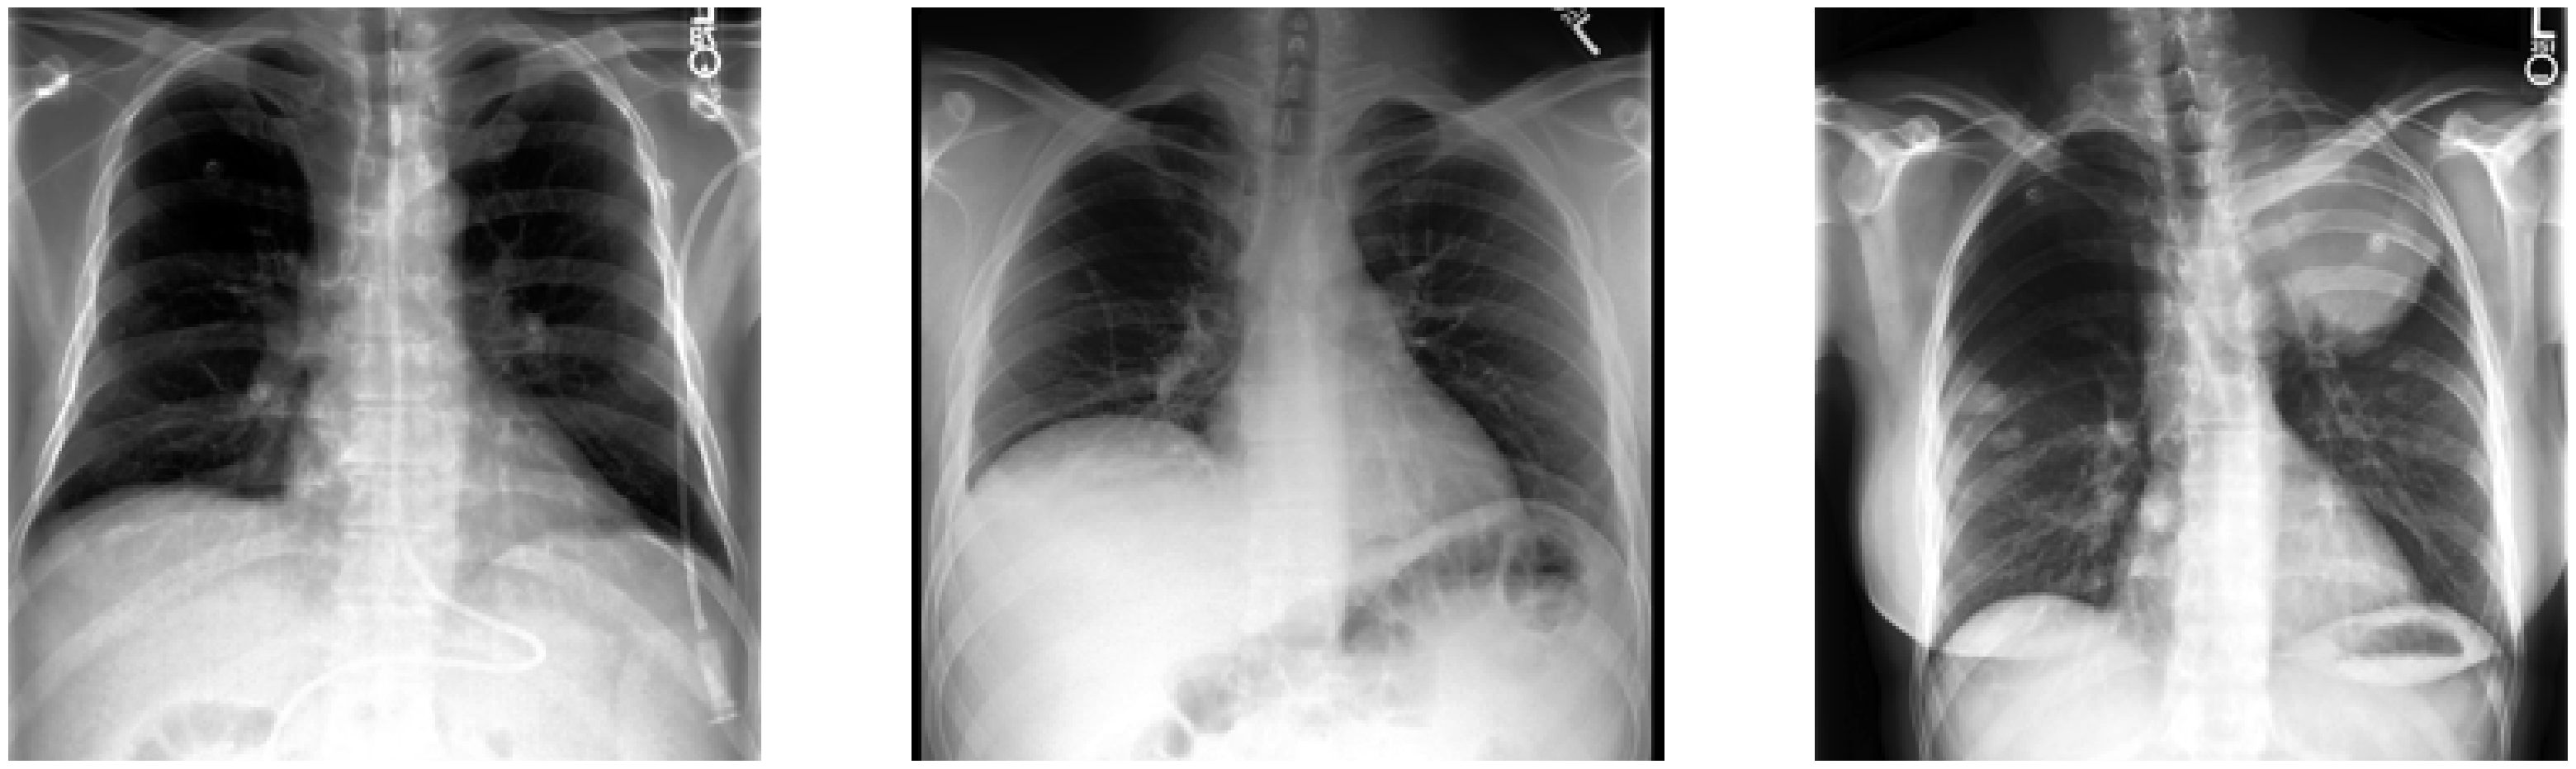

In [9]:
# plot images with target labels = 1
idx, el = np.where(train_dict['labels'].fillna(0).astype(int) == 1)
plot_n_imgs(imgs=train_dict['images'][idx][50:53],n_cols=3,n_rows=1, size=(40,40))

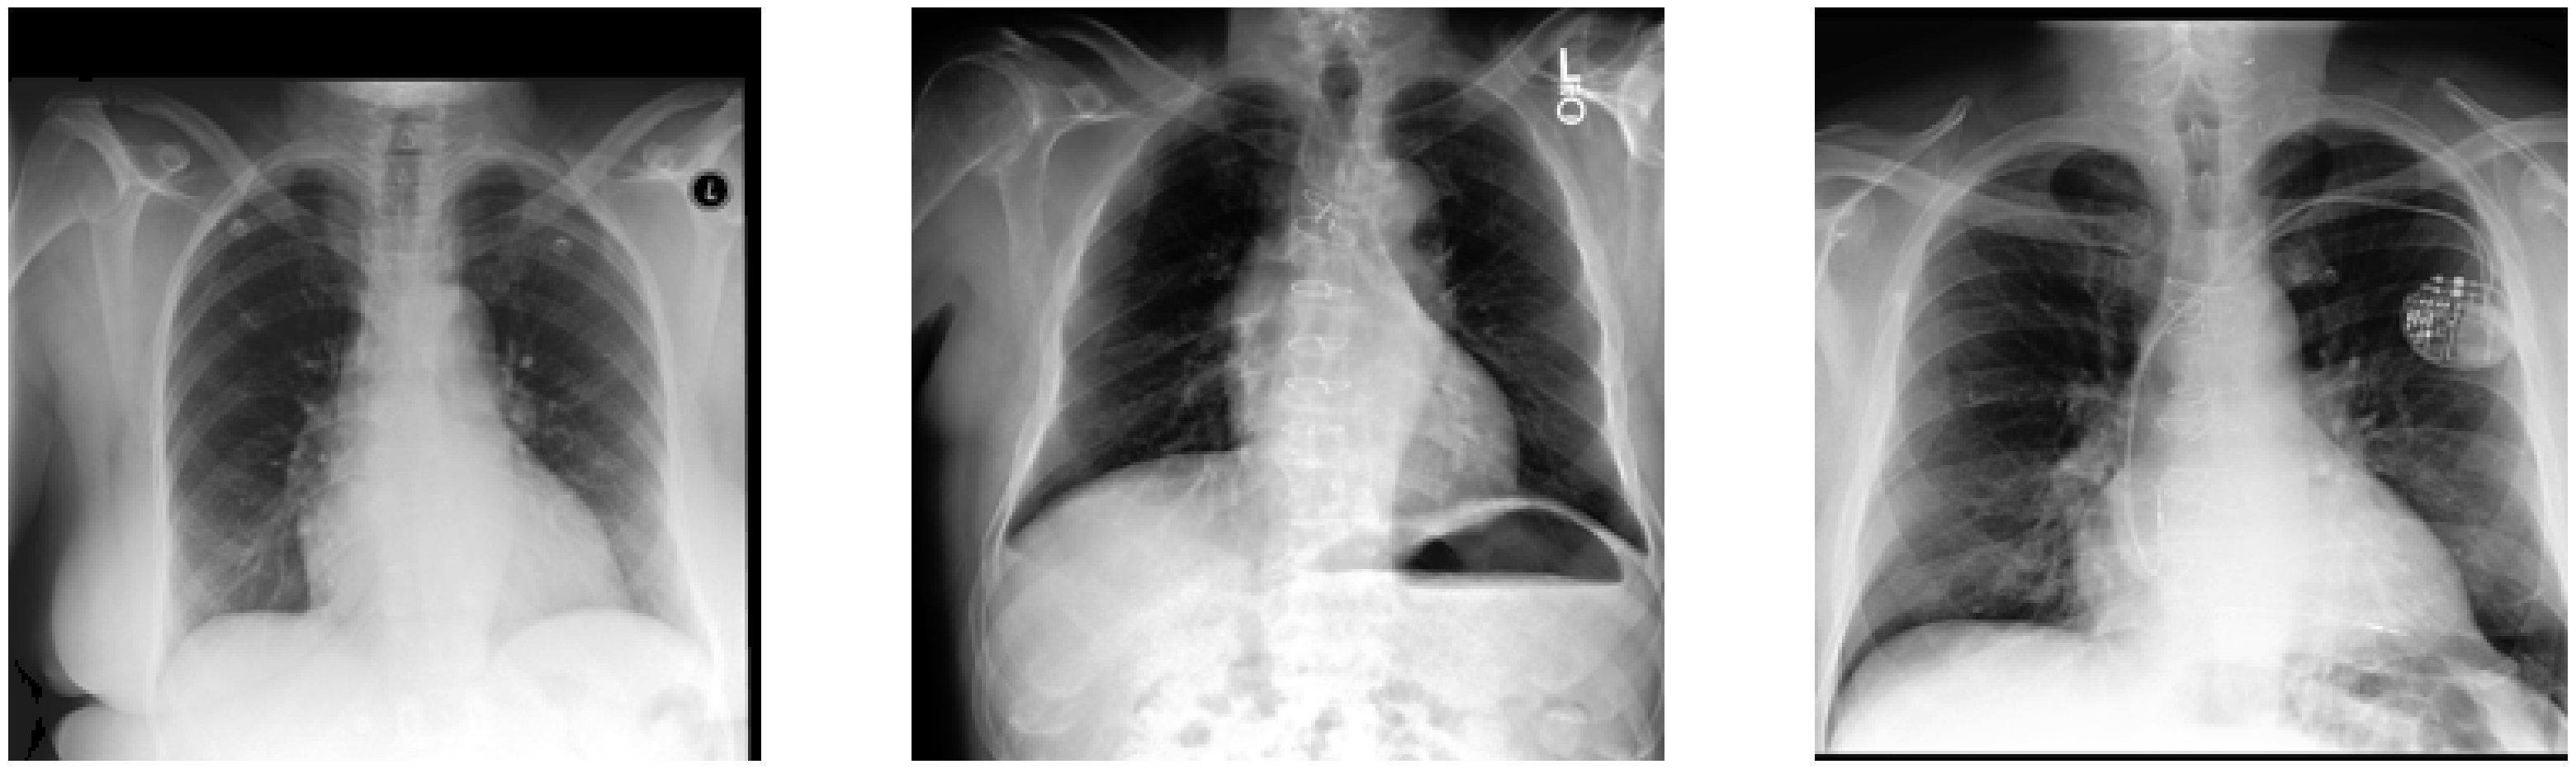

In [5]:
# plot images with target labels = 0
idx, el = np.where(train_dict['labels'].fillna(0).astype(int) == 0)
plot_n_imgs(imgs=train_dict['images'][idx][50:53],n_cols=3,n_rows=1, size=(40,40))

In [10]:
idx

array([   10,    16,    45, ..., 25833, 25834, 25840])

In [7]:
train_dict['dicom_ids']

2        f1adcae3-2921c0a8-5d9652f9-4191ecd7-f2a96f35
3        925b9496-a956d7b2-05185e52-bb33313b-c06ee522
5        ed9c0dfc-ea25b576-0f8cc069-df4cdf14-0cd60eb7
9        2d8a8525-19d0c810-045e1619-ef196132-cd4f1710
10       ab37274f-b4c1fc04-e2ff24b4-4a130ba3-cd167968
                             ...                     
43075    9c390b59-c804f98f-d294205c-60530957-c8107dac
43077    12fad032-cf4eff00-32a4fc65-67e424b6-a2e42afb
43078    4750f069-a4a2b152-61dadb2b-8e7c09a6-1c0578c2
43079    8dc9f5e1-14887015-8db378ef-2fd4441a-d45ee0f3
43081    428e2c18-5721d8f3-35a05001-36f3d080-9053b83c
Name: dicom_id, Length: 25849, dtype: object